### Package

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

### Real data from sakila.db

In [82]:
conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [83]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


### Data info

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [85]:
df.shape

(16044, 10)

In [86]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [87]:
df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


### Most common film rental duration

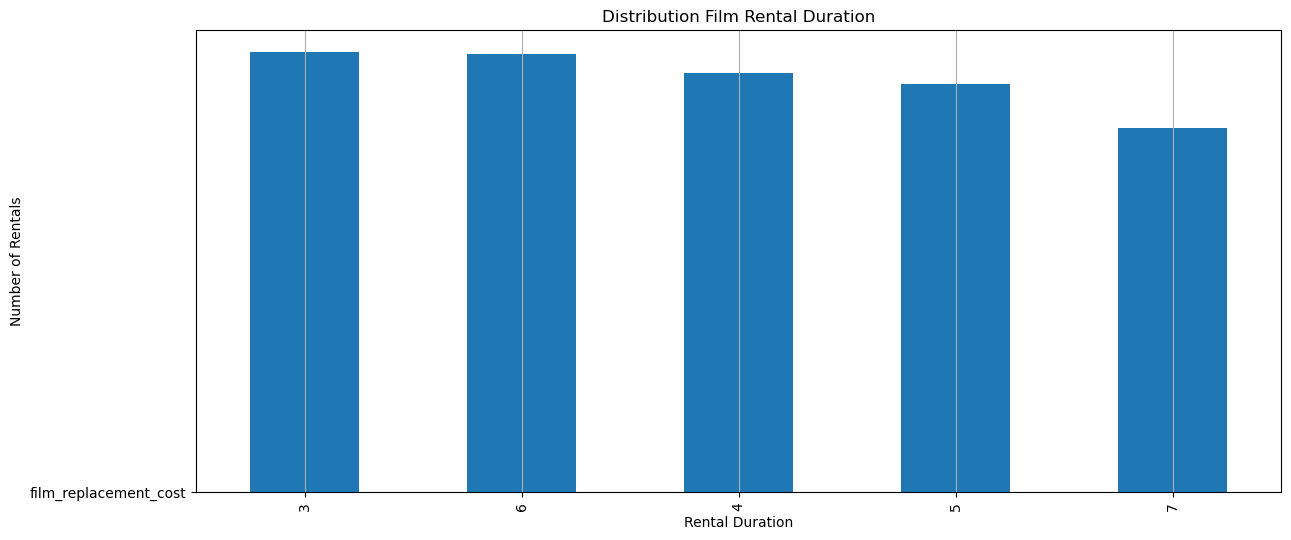

In [88]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel("Rental Duration")
plt.ylabel("Number of Rentals")
plt.title("Distribution Film Rental Duration")
plt.grid()
plt.show()

### Rental rate

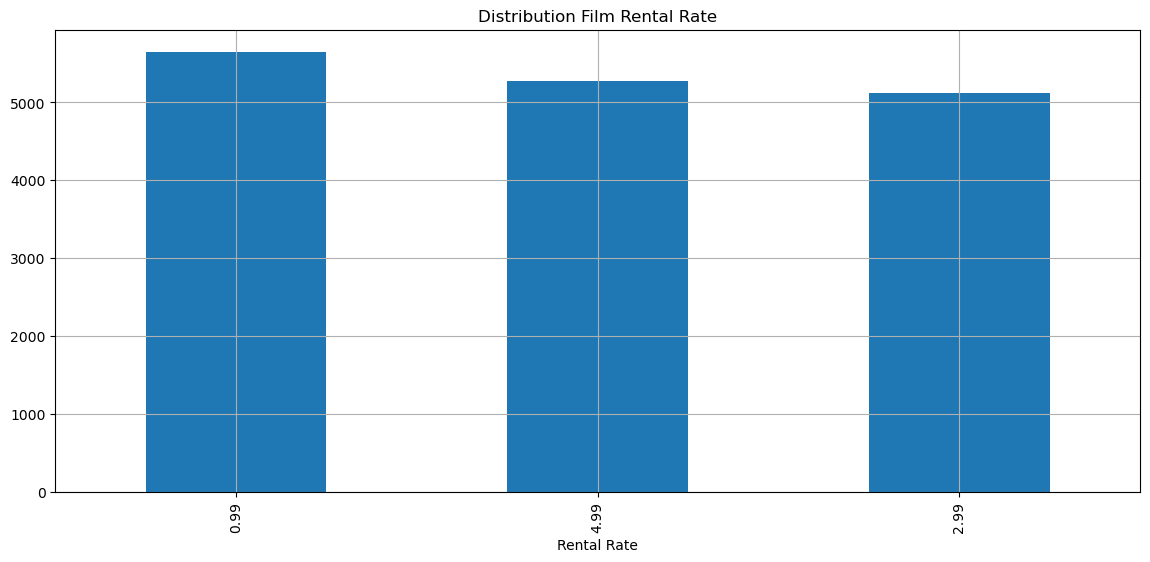

In [89]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel("Rental Rate")
plt.ylabel("")
plt.title("Distribution Film Rental Rate")
plt.grid()
plt.show()

### Replacement cost distributed
- Boxplot of the replacement costs.
- Density plot of the replacement costs.
- Red line on the mean.
- Green line on the median median.

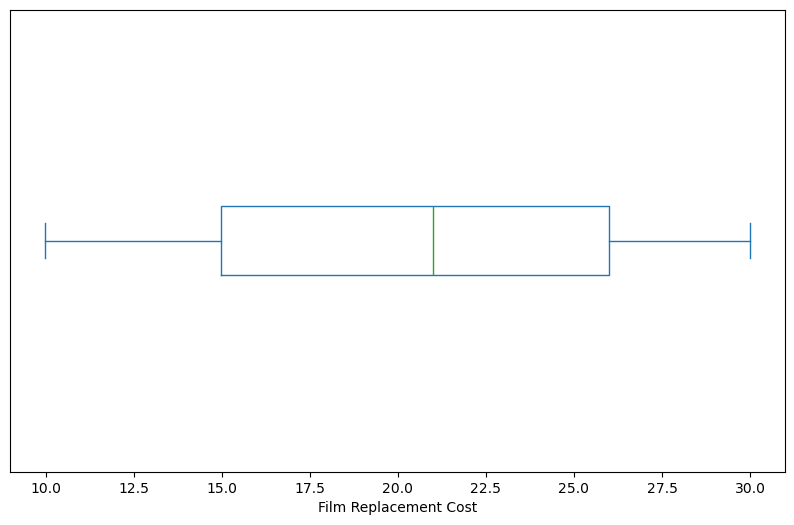

In [91]:
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(10,6))
plt.xlabel("Film Replacement Cost")
plt.yticks([])
plt.show()

### Density plot film_replacement_cost

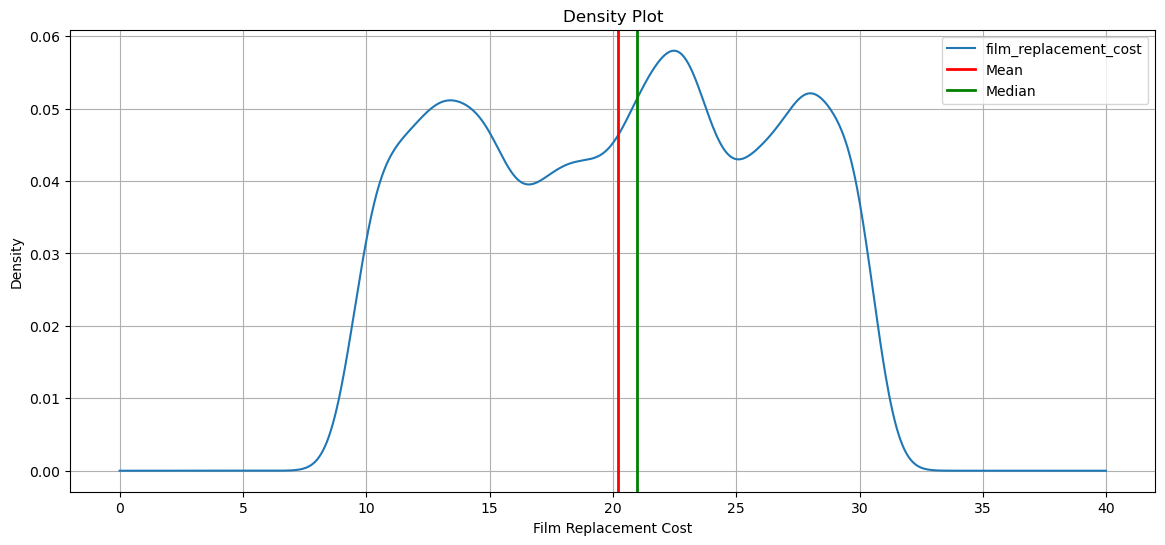

In [100]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='Red', linestyle='-', linewidth=2, label='Mean')
ax.axvline(df['film_replacement_cost'].median(), color='Green', linestyle='-', linewidth=2, label='Median')
plt.xlabel("Film Replacement Cost")
plt.ylabel("Density")
plt.title("Density Plot")
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Films of each rating
- Raw count of each film rating.
- Bar plot with all possible film ratings.

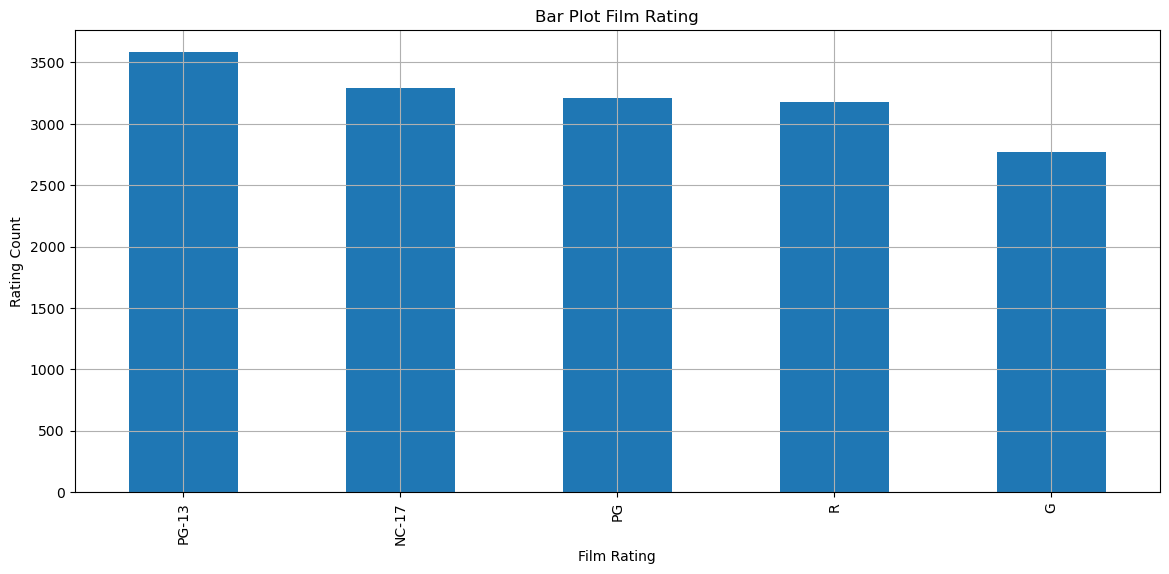

In [105]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel("Film Rating")
plt.ylabel("Rating Count")
plt.title("Bar Plot Film Rating")
plt.grid()
plt.show()

### Film replacement cost vary depending on film rating

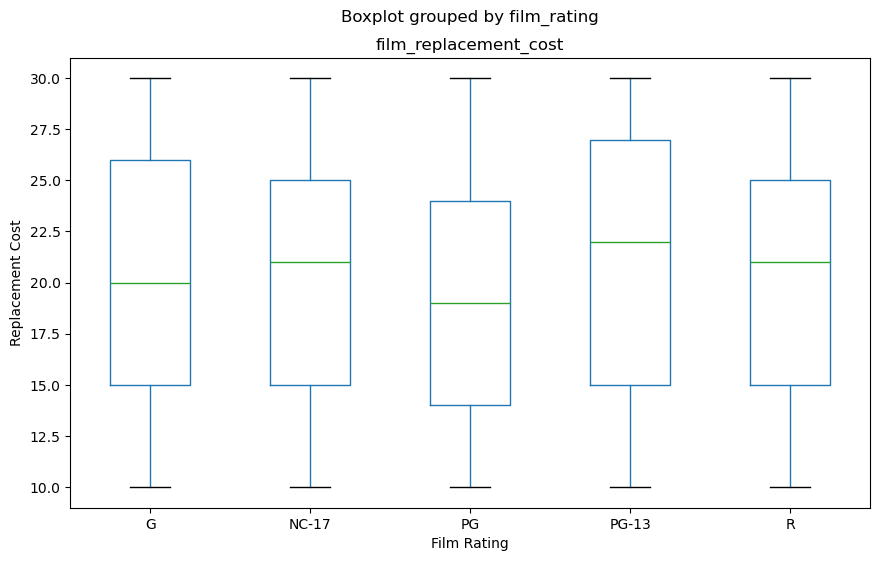

In [112]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(10,6))
plt.xlabel("Film Rating")
plt.ylabel("Replacement Cost")
plt.grid()
plt.show()